In [1]:
import numpy as np
import matplotlib.pyplot as plt

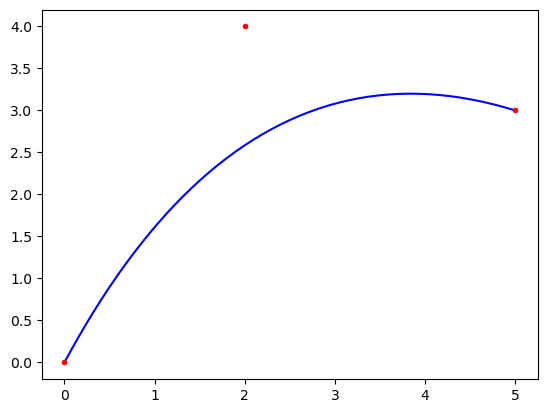

In [12]:
#!/usr/bin/python3
#!--*-- coding: utf-8 --*--
import numpy as np 
import matplotlib.pyplot as plt 

P0, P1, P2 = np.array([[0, 0], [2, 4], [5, 3]])

# 定义贝塞尔曲线
P = lambda t: (1 - t)**2 * P0 + 2 * t * (1 - t) * P1 + t**2 * P2

# 在 [0, 1] 范围内的 50 个点上验证贝塞尔曲线
points = np.array([P(t) for t in np.linspace(0, 1, 50)])

# 分别获取点的 x 坐标和 y 坐标
x, y = points[:, 0], points[:, 1]

# 
plt.plot(x, y, 'b-')
plt.plot(*P0, 'r.')
plt.plot(*P1, 'r.')
plt.plot(*P2, 'r.')
plt.show()

In [14]:
p0, p1, p2 = np.array([[0,0], [2,4], [5,3]])

In [16]:
print(p0)

[0 0]


In [18]:
print(p1)

[2 4]


In [20]:
print(p2)

[5 3]


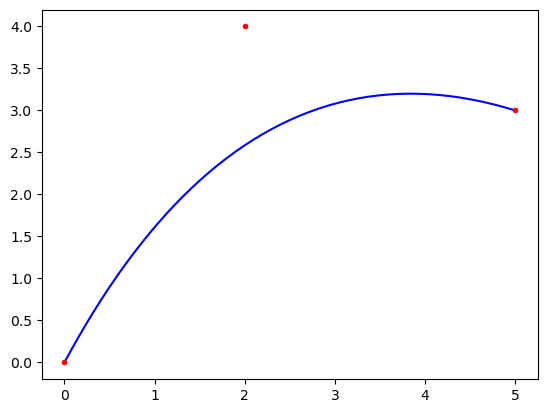

In [23]:
# 定义贝塞尔曲线
P = lambda t:(1-t)**2 *p0 + 2*t*(1-t)*p1 + t**2*p2

# 在【0-1】之间的50个点上验证贝塞尔曲线
points = np.array([P(t) for t in np.linspace(0, 1, 50)])

# 分别获取点的 X坐标 和 Y坐标
x, y = points[:,0], points[:,1]

plt.plot(x, y, 'b-')
plt.plot(*P0, 'r.')
plt.plot(*P1, 'r.')
plt.plot(*P2, 'r.')
plt.show()

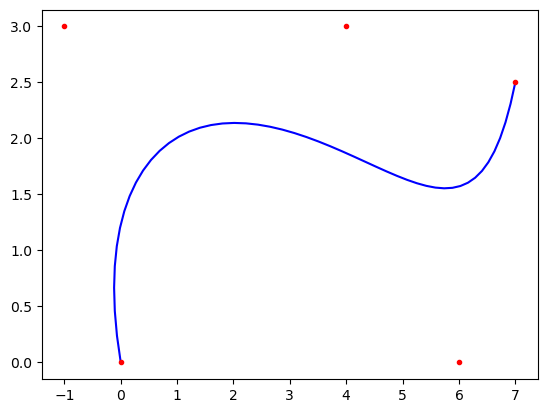

In [25]:
#!/usr/bin/python3
#!--*-- coding: utf-8 --*--
import numpy as np 
import matplotlib.pyplot as plt 
from math import factorial

def comb(n, k):
    return factorial(n) // (factorial(k) * factorial(n-k))

def get_bezier_curve(points):
    n = len(points) - 1
    return lambda t: sum(comb(n, i)*t**i * (1-t)**(n-i)*points[i] for i in range(n+1))

def evaluate_bezier(points, total):
    bezier = get_bezier_curve(points)
    new_points = np.array([bezier(t) for t in np.linspace(0, 1, total)])
    return new_points[:, 0], new_points[:, 1]

points = np.array([[0, 0], [-1, 3], [4, 3], [6, 0], [7, 2.5]])
x, y = points[:, 0], points[:, 1]
bx, by = evaluate_bezier(points, 50)
# 
plt.plot(bx, by, 'b-')
plt.plot(x, y, 'r.')
plt.show()

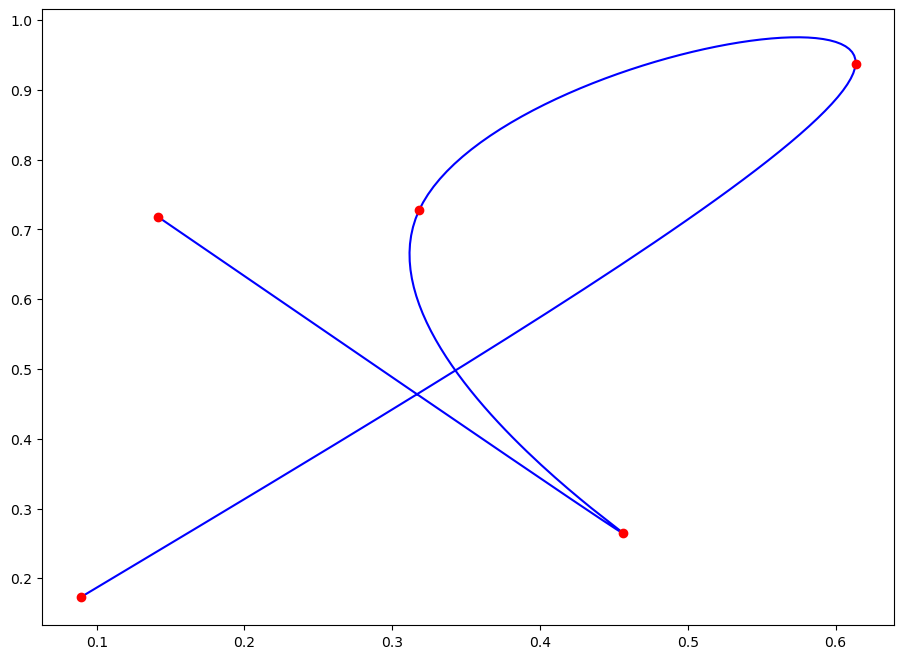

In [27]:
#!/usr/bin/python3
#!--*-- coding: utf-8 --*--
import numpy as np
import matplotlib.pyplot as plt

# find the a & b points
def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2

    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

# returns the general Bezier cubic formula given 4 control points
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])

#
# generate 5 (or any number that you want) random points that we want to fit (or set them youreself)
points = np.random.rand(5, 2)

# fit the points with Bezier interpolation
# use 50 points between each consecutive points to draw the curve
path = evaluate_bezier(points, 50)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.show()